#House Sales in King County, USA
###Predict house price using regression

[Data source](https://www.kaggle.com/junkal/selecting-the-best-regression-model/data)

#### I'm  using here google colab so first setup the colab configration and import google drive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pwd

/content


In [4]:
%cd gdrive/MyDrive/colabspace/MachineLearningProject/Python/src/

/content/gdrive/MyDrive/colabspace/MachineLearningProject/Python/src


In [5]:
!ls -l

total 3676
-rw------- 1 root root 2586666 Apr 18 11:25 00_DBSCAN_Notebook.ipynb
-rw------- 1 root root   50586 Apr 21 07:25 00_titanic_survival_exploration.ipynb
-rw------- 1 root root  204998 Apr 21 07:36 01_finding_donors.ipynb
-rw------- 1 root root  806359 Apr 21 08:51 02_HousePrice.ipynb
-rw------- 1 root root   84650 Apr 18 06:34 03_Hierarchical_clustering_lab.ipynb
drwx------ 2 root root    4096 Apr  5 01:23 datasets
-rw------- 1 root root    2801 Apr  4 15:32 dbscan_lab_helper.py
drwx------ 2 root root    4096 Apr 17 05:36 html
drwx------ 2 root root    4096 Apr 18 11:00 images
drwx------ 2 root root    4096 Apr 18 07:37 __pycache__
-rw------- 1 root root    3857 Apr 17 05:39 README.md
-rw------- 1 root root    5396 Apr  4 15:32 visuals.py


### Import libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratory data analysis and data pre-processing

### Load and read dataset from google drive

In [7]:
house_data = pd.read_csv('datasets/kc_house_data.csv.zip')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Shape of datasets

In [8]:
house_data.shape

(21613, 21)

### Info of datasets

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Checking `NaN` Values

In [10]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2. Feature's Engineering

### Convert data types in suitable format for  Regression model

In [11]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data = house_data.set_index('id')

house_data.price = house_data.price.astype(int)
house_data.bathrooms = house_data.bathrooms.astype(int)
house_data.floors = house_data.floors.astype(int)

In [12]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Find age of building and also `Label encoded` to `yr_renovates` and remove `irrelevante columns`

In [13]:
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)

house_data = house_data.drop('date', axis =1)
house_data = house_data.drop('yr_renovated', axis=1)
house_data = house_data.drop('yr_built', axis=1)

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


### Shape of dataset

In [14]:
house_data.shape

(21613, 19)

### Find `count`, `mean`, `std` etc up to two decimale digits

In [15]:
pd.set_option('precision', 2)

house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,5.40e+05,367127.20,75000.00,321950.00,450000.00,645000.00,7.70e+06
bedrooms,21613.0,3.37e+00,0.93,0.00,3.00,3.00,4.00,3.30e+01
bathrooms,21613.0,1.75e+00,0.73,0.00,1.00,2.00,2.00,8.00e+00
sqft_living,21613.0,2.08e+03,918.44,290.00,1427.00,1910.00,2550.00,1.35e+04
sqft_lot,21613.0,1.51e+04,41420.51,520.00,5040.00,7618.00,10688.00,1.65e+06
floors,21613.0,1.45e+00,0.55,1.00,1.00,1.00,2.00,3.00e+00
waterfront,21613.0,7.54e-03,0.09,0.00,0.00,0.00,0.00,1.00e+00
view,21613.0,2.34e-01,0.77,0.00,0.00,0.00,0.00,4.00e+00
condition,21613.0,3.41e+00,0.65,1.00,3.00,3.00,4.00,5.00e+00
grade,21613.0,7.66e+00,1.18,1.00,7.00,7.00,8.00,1.30e+01


### Correlation matrix

In [16]:
correlation = house_data.corr(method='pearson')
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
price,1.00,3.08e-01,0.51,0.70,8.97e-02,2.37e-01,2.66e-01,3.97e-01,3.64e-02,0.67,6.06e-01,0.32,-5.32e-02,3.07e-01,0.02,5.85e-01,8.24e-02,-0.05,1.26e-01
bedrooms,0.31,1.00e+00,0.47,0.58,3.17e-02,1.56e-01,-6.58e-03,7.95e-02,2.85e-02,0.36,4.78e-01,0.30,-1.53e-01,-8.93e-03,0.13,3.92e-01,2.92e-02,-0.15,1.86e-02
bathrooms,0.51,4.67e-01,1.00,0.70,8.53e-02,4.85e-01,5.88e-02,1.77e-01,-1.26e-01,0.61,6.40e-01,0.25,-1.60e-01,3.14e-02,0.18,5.10e-01,8.08e-02,-0.43,6.00e-02
sqft_living,0.70,5.77e-01,0.70,1.00,1.73e-01,3.53e-01,1.04e-01,2.85e-01,-5.88e-02,0.76,8.77e-01,0.44,-1.99e-01,5.25e-02,0.24,7.56e-01,1.83e-01,-0.32,5.51e-02
sqft_lot,0.09,3.17e-02,0.09,0.17,1.00e+00,-8.95e-03,2.16e-02,7.47e-02,-8.96e-03,0.11,1.84e-01,0.02,-1.30e-01,-8.57e-02,0.23,1.45e-01,7.19e-01,-0.05,7.75e-03
floors,0.24,1.56e-01,0.48,0.35,-8.95e-03,1.00e+00,1.96e-02,2.47e-02,-2.93e-01,0.47,5.18e-01,-0.24,-9.67e-02,2.96e-02,0.16,2.97e-01,-1.33e-02,-0.58,-7.85e-03
waterfront,0.27,-6.58e-03,0.06,0.10,2.16e-02,1.96e-02,1.00e+00,4.02e-01,1.67e-02,0.08,7.21e-02,0.08,3.03e-02,-1.43e-02,-0.04,8.65e-02,3.07e-02,0.03,9.33e-02
view,0.40,7.95e-02,0.18,0.28,7.47e-02,2.47e-02,4.02e-01,1.00e+00,4.60e-02,0.25,1.68e-01,0.28,8.48e-02,6.16e-03,-0.08,2.80e-01,7.26e-02,0.05,1.04e-01
condition,0.04,2.85e-02,-0.13,-0.06,-8.96e-03,-2.93e-01,1.67e-02,4.60e-02,1.00e+00,-0.14,-1.58e-01,0.17,3.03e-03,-1.49e-02,-0.11,-9.28e-02,-3.41e-03,0.36,-6.01e-02
grade,0.67,3.57e-01,0.61,0.76,1.14e-01,4.73e-01,8.28e-02,2.51e-01,-1.45e-01,1.00,7.56e-01,0.17,-1.85e-01,1.14e-01,0.20,7.13e-01,1.19e-01,-0.45,1.40e-02


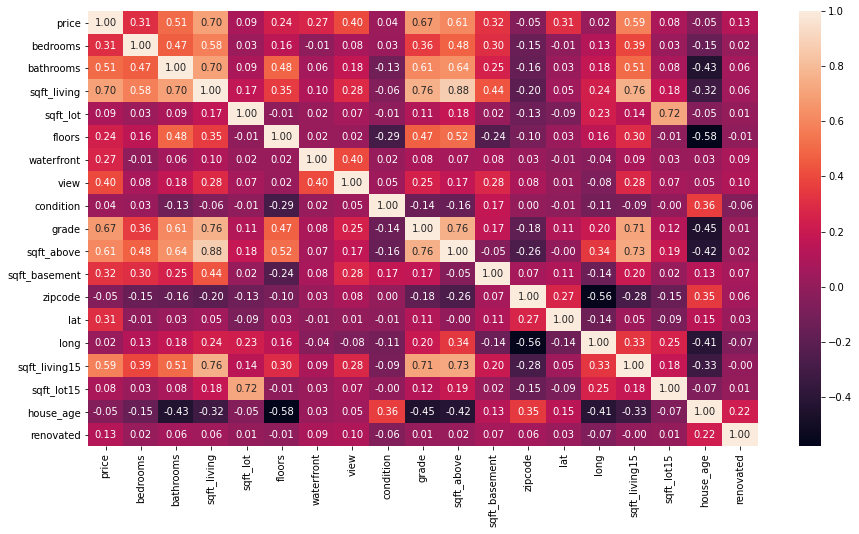

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, cbar = True, annot=True, fmt='.2f')
plt.show()

## 3. Baseline algorithm test

### Split dataset into traing and testing set

In [18]:
target = house_data['price']
features = house_data.drop(['price', 'lat', 'long'], axis=1)

### Find top ten most relevant feature's columns by using RFE

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [19]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression(normalize = True)

from sklearn.feature_selection import RFE
rfe = RFE(estimator = linearRegression, n_features_to_select = 10, step = 1)
rfe.fit(features,target)
#RFE?

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=True),
    n_features_to_select=10, step=1, verbose=0)

### Most relevant features selected

In [20]:
recursive_features = features.columns[rfe.support_]
recursive_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'house_age', 'renovated'],
      dtype='object')

In [21]:
X = features[recursive_features]
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,house_age,renovated
id,,,,,,,,,,
7129300520,3,1,1180,1,0,0,3,7,59,0
6414100192,3,2,2570,2,0,0,3,7,63,1
5631500400,2,1,770,1,0,0,3,6,82,0
2487200875,4,3,1960,1,0,0,5,7,49,0
1954400510,3,2,1680,1,0,0,3,8,28,0


In [22]:
X = X.values
y = target.values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =21)


In [24]:
def best_model(model, X_train, y_train, X_test, y_test):
    
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Training score :{}'.format(model.score(X_train, y_train)))
    print('Testing score: {}'.format(r2_score(y_test, y_pred)))
    print('r2_score: {}'.format(r2_score(y_test, y_pred)))
    
    return y_pred, y_test   

### Learning curve function

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [25]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def draw_learning_curves(X, y, estimator, cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
    plt.figure(figsize=(12,8))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid(True)

    plt.title("Learning Curves", fontsize=22)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    return train_scores_mean, test_scores_mean

### Cross validation

In [26]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

### Import models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression model 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [28]:
linear_regression = LinearRegression()
y_pred, y_test = best_model(linear_regression, X_train, y_train, X_test, y_test)


df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df.sample(10)

Training score :0.6513744779893142
Testing score: 0.6618464047555932
r2_score: 0.6618464047555932


,Test,Predicted
3243,405000,376669.32
2839,725000,692433.68
3733,549950,690322.93
1482,439000,518348.91
1730,249900,273312.29
1998,500000,372495.73
1711,320000,592389.80
3943,769900,597869.29
3523,580000,600404.83
2953,210000,289961.88


### Graphical view of test values vs predicted values, (Only 20 - 20 data points are taken)

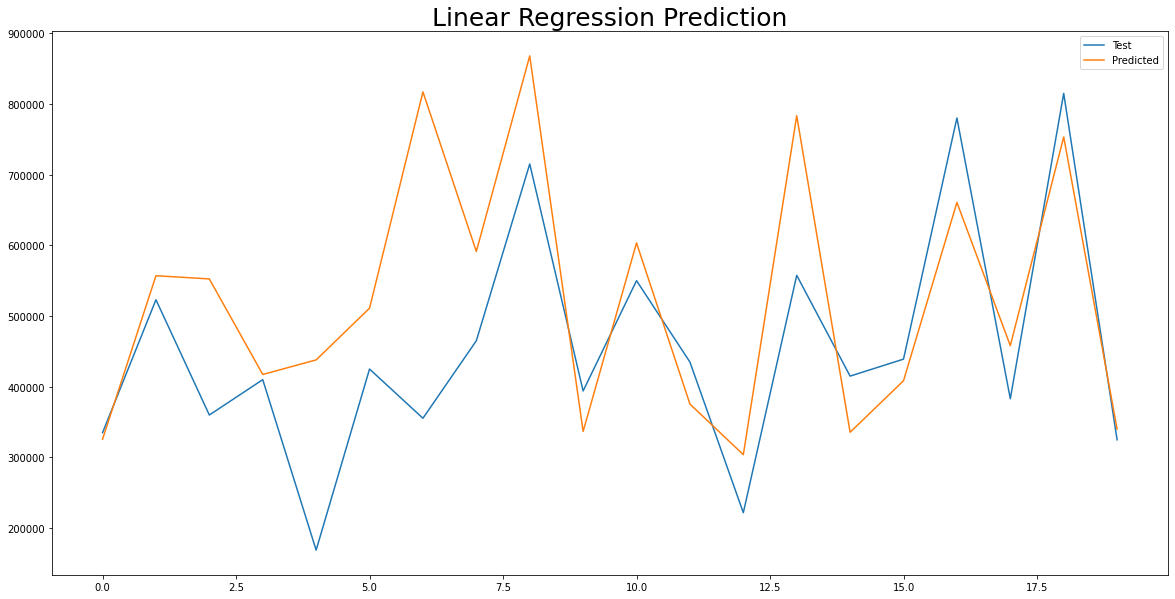

In [29]:
plt.figure(figsize=(20, 10))

plt.plot(y_test[:20], label='Test')
plt.plot(y_pred[:20], label='Predicted')
plt.legend()
plt.title('Linear Regression Prediction', fontsize=25)
plt.show()

### Learning curve for Linear regression

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

#### In below diagram you can see that training scores are decreasing  and testing scores are increasing and then goes to certain level (about 65% accuracy) and heance we can conclude that our model is good for genralization with good score but not best.

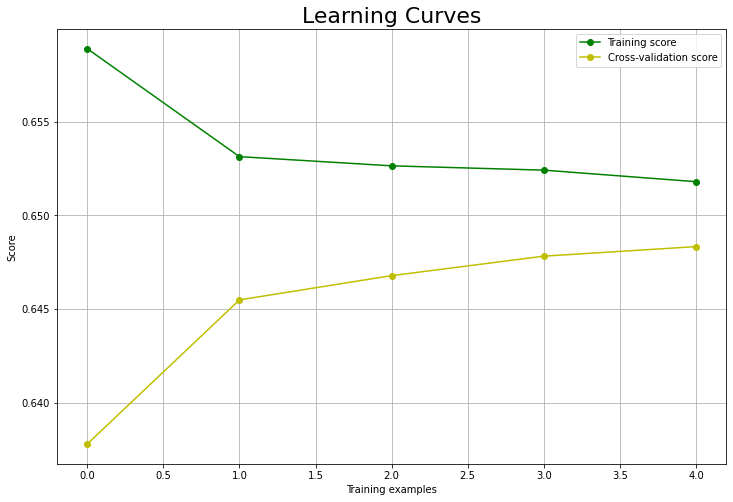

In [30]:
train_score, test_score = draw_learning_curves(X_train, y_train, linear_regression, cv)

In [31]:
print('Training score mean: ', train_score)
print('Testing score mean: ', test_score)

Training score mean:  [0.65890236 0.65314101 0.65264934 0.65241949 0.65180397]
Testing score mean:  [0.6378003  0.64549374 0.64678839 0.64782765 0.64833812]


### Importing libraries for DecisionTreeRegression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import learning_curve

### Predict values by DecisionTreeRegression 

In [33]:
decision_tree_estimator = DecisionTreeRegressor()
y_pred, y_test = best_model(decision_tree_estimator, X_train, y_train, X_test, y_test)
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df.sample(10)

Training score :0.9969916074712795
Testing score: 0.4739888563035872
r2_score: 0.4739888563035872


,Test,Predicted
1420,510000,3.60e+05
2466,1313000,5.42e+05
1448,538000,5.91e+05
2986,453000,5.20e+05
438,226740,2.88e+05
2781,275000,3.70e+05
864,555000,1.20e+06
1802,449500,4.18e+05
1626,340000,6.20e+05
3516,722080,1.07e+06


### Find estimator score using cross-validation score

https://scikit-learn.org/stable/modules/cross_validation.html

In [34]:
estimator_score = cross_val_score(decision_tree_estimator, X_train, y_train, cv=5)
estimator_score

array([0.36306184, 0.47836237, 0.43685717, 0.4925103 , 0.5010145 ])

### Graphical view of test values vs predicted values, (Only 20 - 20 data points are taken)

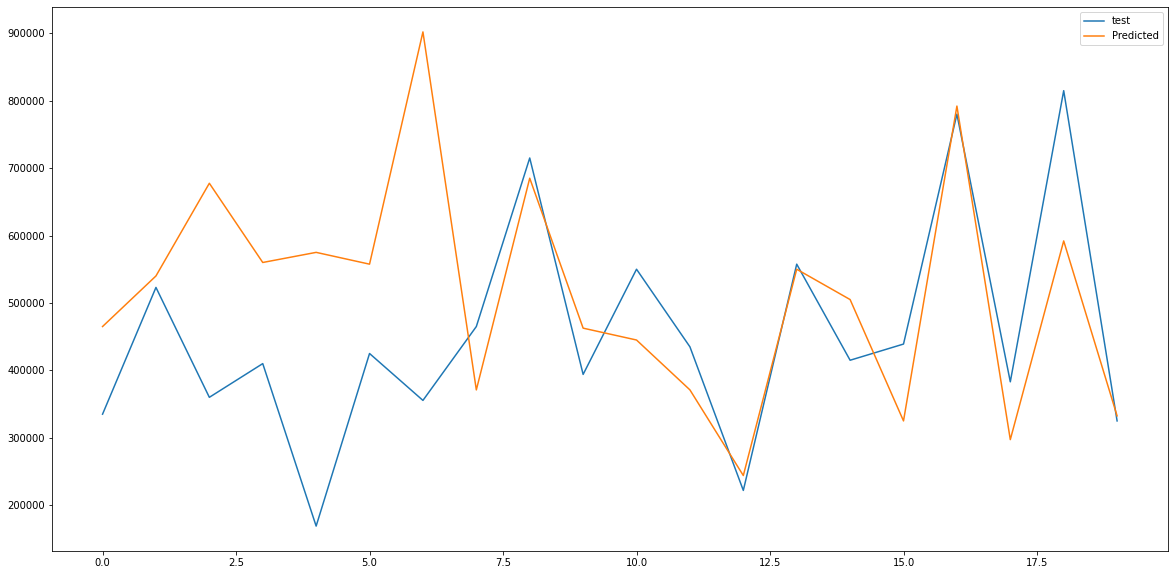

In [35]:
plt.figure(figsize=(20, 10))

plt.plot(y_test[:20], label='test')
plt.plot(y_pred[:20], label='Predicted')
plt.legend()
plt.show()

### Learning curve for Decision tree regression

#### In below diagram you can see that training scores are higher and testing scores are lower, that means this model goes over fit (this model isn't for generalization )

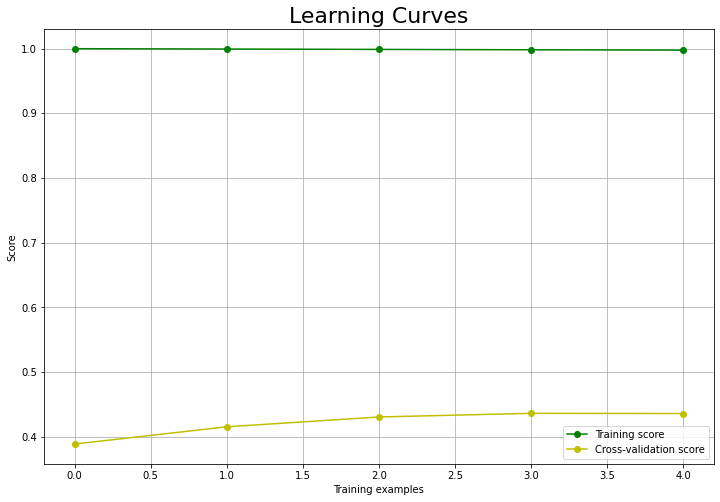

In [36]:
train_score, test_score = draw_learning_curves(X_train, y_train, decision_tree_estimator, cv)

In [37]:
print('Training score mean', train_score)
print('Testing score mean', test_score)

Training score mean [0.99973346 0.99918992 0.99860815 0.99805434 0.99752986]
Testing score mean [0.38855558 0.41519612 0.43037092 0.43602173 0.43571988]


### KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [38]:
k_neighbios_estimator = KNeighborsRegressor()
y_pred, y_test = best_model(k_neighbios_estimator, X_train, y_train, X_test, y_test)
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df.sample(10)

Training score :0.6779464581570667
Testing score: 0.5230855035265762
r2_score: 0.5230855035265762


,Test,Predicted
2130,648000,5.94e+05
1418,320000,3.46e+05
88,320000,5.38e+05
505,645000,4.71e+05
199,320000,4.49e+05
4112,339950,4.49e+05
3047,1598000,1.10e+06
2540,535000,3.08e+05
2611,1030000,7.99e+05
3751,300000,3.70e+05


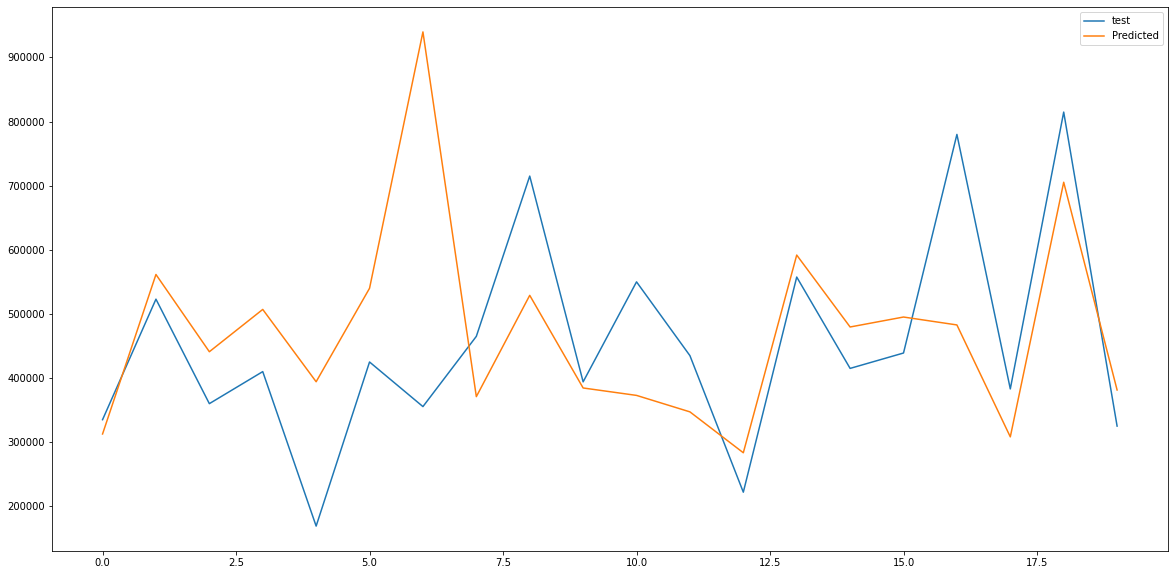

In [39]:
plt.figure(figsize=(20, 10))

plt.plot(y_test[:20], label='test')
plt.plot(y_pred[:20], label='Predicted')
plt.legend()
plt.show()

### Learning curve for KNeighborRegression


#### In below diagram you can see that training and testing score increasing. that means model is good but low accuracy.

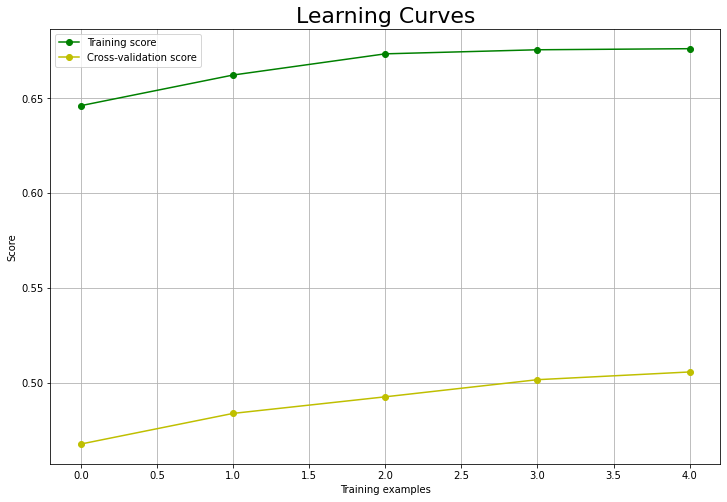

In [40]:
train_score, test_score = draw_learning_curves(X_train, y_train, k_neighbios_estimator, cv)

In [41]:
print('Training score mean', train_score)
print('Testing score mean', test_score)

Training score mean [0.64622055 0.66238552 0.67357474 0.67572272 0.67629465]
Testing score mean [0.46756275 0.4837349  0.49249113 0.5015367  0.50561616]


### GradientBoostingRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [42]:
gb_regressor = GradientBoostingRegressor()
y_pred, y_test = best_model(gb_regressor, X_train, y_train, X_test, y_test)
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df.sample(10)

Training score :0.7666224798940087
Testing score: 0.7187863148037035
r2_score: 0.7187863148037035


,Test,Predicted
1218,858000,8.47e+05
2586,260000,3.83e+05
3939,255000,3.24e+05
359,430000,4.25e+05
1545,400000,2.70e+05
3060,348000,5.64e+05
1798,235000,3.93e+05
1529,950000,1.01e+06
3725,1010000,4.48e+05
205,940000,1.01e+06


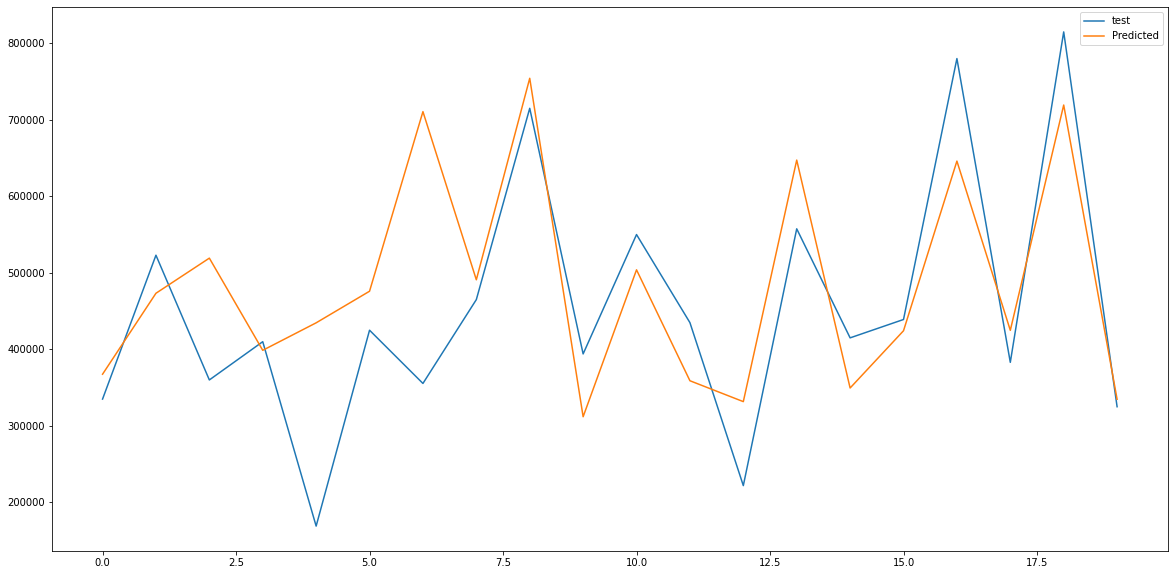

In [43]:
plt.figure(figsize=(20, 10))

plt.plot(y_test[:20], label='test')
plt.plot(y_pred[:20], label='Predicted')
plt.legend()
plt.show()

### Learning curve for GradientBostingRegression

#### in this diagram you can see that training scores are decresing slightly and testing scores are incresing and it becomes about 71% score that means this the best regrassion model compare to rest of the above and it's good for generalization.

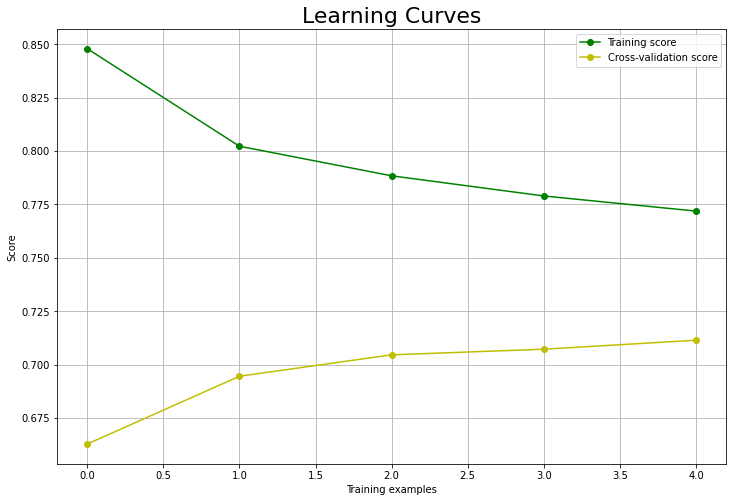

In [44]:
train_score, test_score = draw_learning_curves(X_train, y_train, gb_regressor, cv)

In [45]:
print('Training score mean', train_score)
print('Testing score mean', test_score)

Training score mean [0.84793653 0.80227746 0.78842487 0.77899061 0.77190959]
Testing score mean [0.66286996 0.6946008  0.70462822 0.7072572  0.71146654]
